## Principais pacotes utilizados

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## Principais características da Tabela transactional_data

In [64]:
transactional_data = pd.read_csv('transactional_data.csv', sep=";")

In [65]:
transactional_data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [66]:
transactional_data = transactional_data.rename(columns={'Lab Id':'Lab_Id','Testing Cost':'Testing_Cost'})

In [67]:
transactional_data.dtypes

Patient Id         object
Gender             object
Date of birth      object
Date of service    object
Service Id         object
Lab_Id             object
CodItem             int64
Testing_Cost       object
dtype: object

## Principais características da Tabela df_geocode

In [68]:
df_geocode = pd.read_csv('df_geocode.csv', sep=";")

In [69]:
df_geocode.head()

,Lab Id,Address,location,zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30044
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469


In [70]:
df_geocode = df_geocode.rename(columns={'Lab Id':'Lab_Id'})

In [71]:
df_geocode.dtypes

Lab_Id      object
Address     object
location    object
zipcode      int64
dtype: object

## Realizando o join da Tabela transactional_data com df_geocode

In [72]:
df_left = transactional_data.merge(df_geocode, on='Lab_Id', how='left')

In [73]:
df_left.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0","2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0","2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0","2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0","2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0","2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0


In [74]:
df_left.to_csv('df_left.csv') 

In [75]:
df_left.shape

(2355241, 11)

In [76]:
df_left.dtypes

Patient Id          object
Gender              object
Date of birth       object
Date of service     object
Service Id          object
Lab_Id              object
CodItem              int64
Testing_Cost        object
Address             object
location            object
zipcode            float64
dtype: object

## Principais características da Tabela test_data

In [77]:
test_data = pd.read_csv('test_data.csv', sep=";")

In [78]:
test_data.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,"1,78"
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,"2,46"
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,"2,11"
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,Corelab,BIOCHEMISTRY,"0,8"
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,"1,02"


In [79]:
test_data.dtypes

CodItem          int64
Desc Item       object
Category        object
Family          object
Speciality      object
Testing Cost    object
dtype: object

In [80]:
test_data = test_data.rename(columns={'Testing Cost':'Testing_Cost'})

In [81]:
test_data.columns

Index(['CodItem', 'Desc Item', 'Category', 'Family', 'Speciality',
       'Testing_Cost'],
      dtype='object')

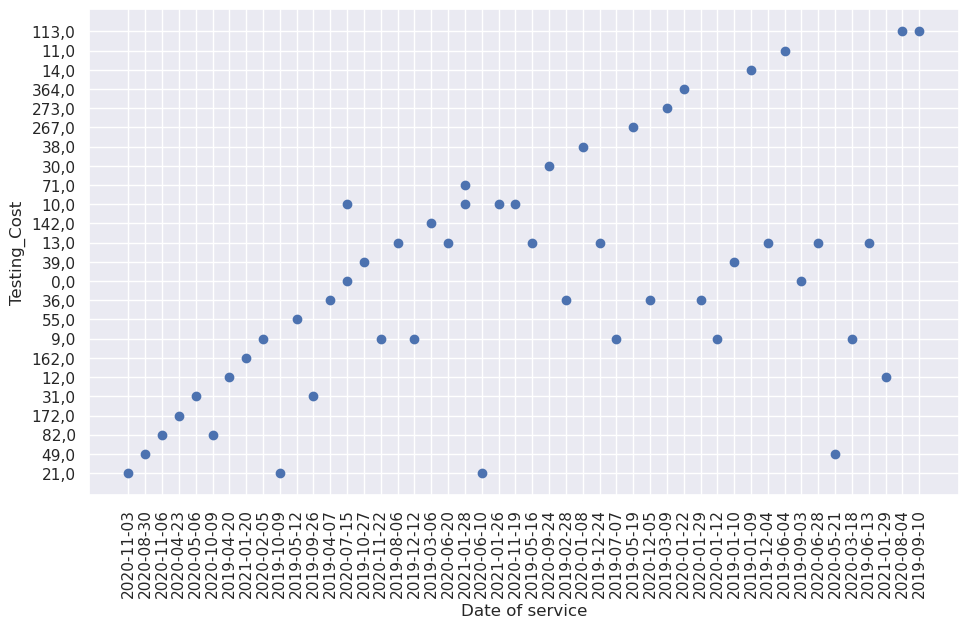

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_left['Date of service'].sample(50), df_left['Testing_Cost'].sample(50))
ax.set_xlabel('Date of service')
ax.set_ylabel('Testing_Cost')
plt.xticks(rotation=90)

plt.show()

## Análise de Outlier

In [83]:
df_left['Testing_Cost'] = df_left['Testing_Cost'].str.replace(',', '.') #202211017718329

## Preprocessamento dos Dados

In [84]:
df_left.isnull().sum()


Patient Id          0
Gender              0
Date of birth       1
Date of service     0
Service Id          0
Lab_Id              0
CodItem             0
Testing_Cost        0
Address            24
location           24
zipcode            24
dtype: int64

In [85]:
df_left.columns

Index(['Patient Id', 'Gender', 'Date of birth', 'Date of service',
       'Service Id', 'Lab_Id', 'CodItem', 'Testing_Cost', 'Address',
       'location', 'zipcode'],
      dtype='object')

In [86]:
df_left.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0


In [87]:
df_left = df_left.dropna()

In [88]:
df_left.shape

(2355216, 11)

In [89]:
df_left.dtypes

Patient Id          object
Gender              object
Date of birth       object
Date of service     object
Service Id          object
Lab_Id              object
CodItem              int64
Testing_Cost        object
Address             object
location            object
zipcode            float64
dtype: object

In [90]:
df_left = df_left.drop_duplicates()
df_left.head(5)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0


In [91]:
print(df_left.isnull().sum())

Patient Id         0
Gender             0
Date of birth      0
Date of service    0
Service Id         0
Lab_Id             0
CodItem            0
Testing_Cost       0
Address            0
location           0
zipcode            0
dtype: int64


In [92]:
df_left.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0


In [93]:
df_left['Testing_Cost'] = df_left['Testing_Cost'].astype(float)

In [94]:
df_left.dtypes

Patient Id          object
Gender              object
Date of birth       object
Date of service     object
Service Id          object
Lab_Id              object
CodItem              int64
Testing_Cost       float64
Address             object
location            object
zipcode            float64
dtype: object

In [95]:
df_left.nunique()

Patient Id         501422
Gender                  3
Date of birth       32914
Date of service       770
Service Id         660035
Lab_Id                117
CodItem              2063
Testing_Cost          495
Address               117
location              116
zipcode               104
dtype: int64

In [96]:
df_left.columns

Index(['Patient Id', 'Gender', 'Date of birth', 'Date of service',
       'Service Id', 'Lab_Id', 'CodItem', 'Testing_Cost', 'Address',
       'location', 'zipcode'],
      dtype='object')

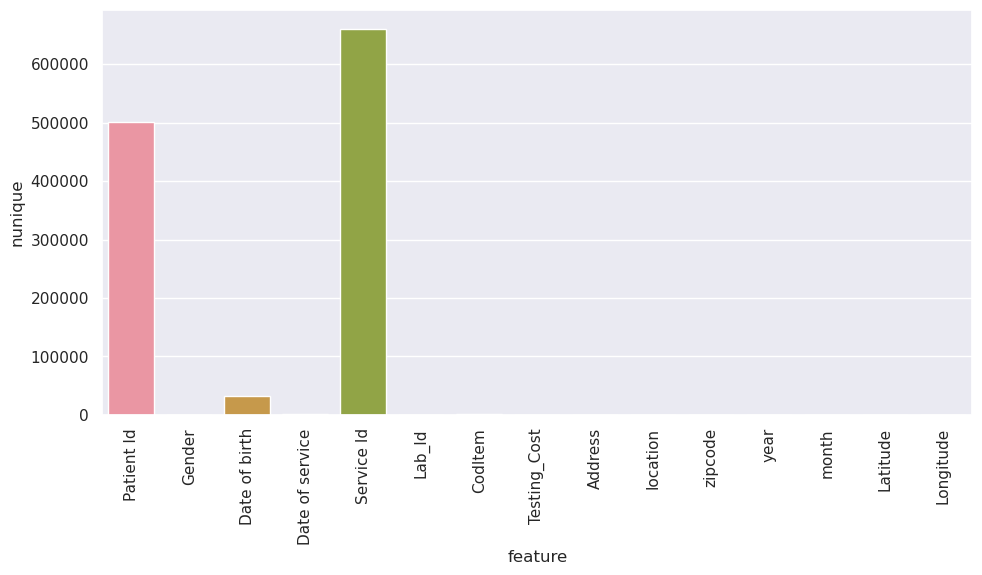

In [182]:
nu = df_left.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


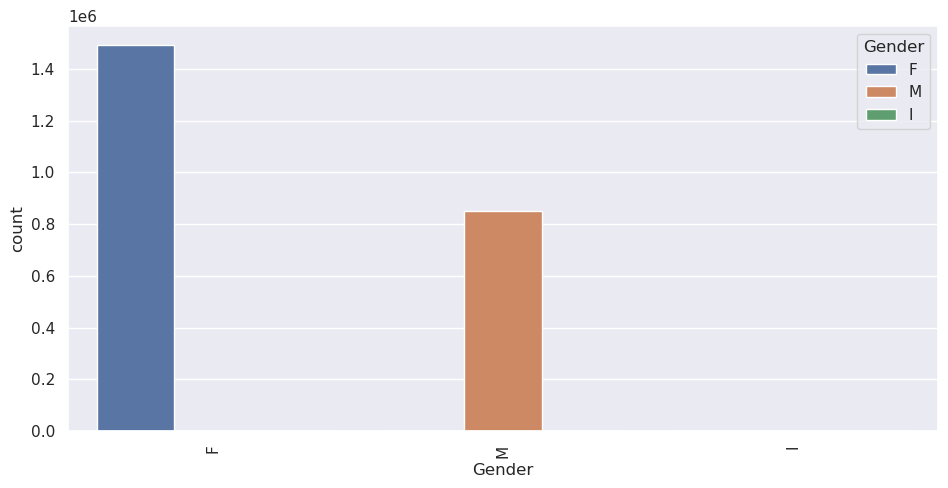

In [183]:
import seaborn as sns
ax = sns.countplot(data=df_left,x='Gender',hue='Gender')
ax.tick_params(axis='x', rotation=90)


In [99]:
df_left['Date of service'] = pd.to_datetime(df_left['Date of service'])
df_left['year'] = df_left['Date of service'].dt.year
df_left['month'] = df_left['Date of service'].dt.month

In [100]:
df_left.head(2)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode,year,month
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1


In [101]:
df_left['Latitude']= df_left.location.str.split(',', expand =True)[0]
df_left['Longitude'] = df_left.location.str.split(',', expand =True)[1]

In [102]:
df_left.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode,year,month,Latitude,Longitude
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574


In [103]:
df_left.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340697 entries, 0 to 2355240
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   Patient Id       object        
 1   Gender           object        
 2   Date of birth    object        
 3   Date of service  datetime64[ns]
 4   Service Id       object        
 5   Lab_Id           object        
 6   CodItem          int64         
 7   Testing_Cost     float64       
 8   Address          object        
 9   location         object        
 10  zipcode          float64       
 11  year             int64         
 12  month            int64         
 13  Latitude         object        
 14  Longitude        object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 285.7+ MB


In [104]:
df_left.isna().sum()
# there is no null data

Patient Id            0
Gender                0
Date of birth         0
Date of service       0
Service Id            0
Lab_Id                0
CodItem               0
Testing_Cost          0
Address               0
location              0
zipcode               0
year                  0
month                 0
Latitude              0
Longitude          1589
dtype: int64

In [105]:
df_left.describe().round(2)


,CodItem,Testing_Cost,zipcode,year,month
count,2340697.00,2340697.0,2340697.00,2340697.00,2340697.00
mean,70003215.36,51.1,52958.93,2019.57,6.03
std,1907.71,97.9,37429.56,0.60,3.54
min,70000038.00,0.0,1605.00,2019.00,1.00
25%,70001127.00,11.0,19140.00,2019.00,3.00
50%,70003759.00,24.0,30228.00,2020.00,6.00
75%,70004461.00,49.0,94588.00,2020.00,9.00
max,70008999.00,9500.0,99999.00,2021.00,12.00


In [106]:
df_left.duplicated().sum()


0

In [107]:
df_left.columns


Index(['Patient Id', 'Gender', 'Date of birth', 'Date of service',
       'Service Id', 'Lab_Id', 'CodItem', 'Testing_Cost', 'Address',
       'location', 'zipcode', 'year', 'month', 'Latitude', 'Longitude'],
      dtype='object')

In [108]:
df_left.nunique()

Patient Id         501422
Gender                  3
Date of birth       32914
Date of service       770
Service Id         660035
Lab_Id                117
CodItem              2063
Testing_Cost          495
Address               117
location              116
zipcode               104
year                    3
month                  12
Latitude              116
Longitude             115
dtype: int64

In [109]:
df_left.Gender.unique()

array(['F', 'M', 'I'], dtype=object)

In [110]:
df_left.year.unique()

array([2019, 2020, 2021])

In [198]:
df_left.Gender.value_counts(normalize=True)

F    0.636994
M    0.363002
I    0.000004
Name: Gender, dtype: float64

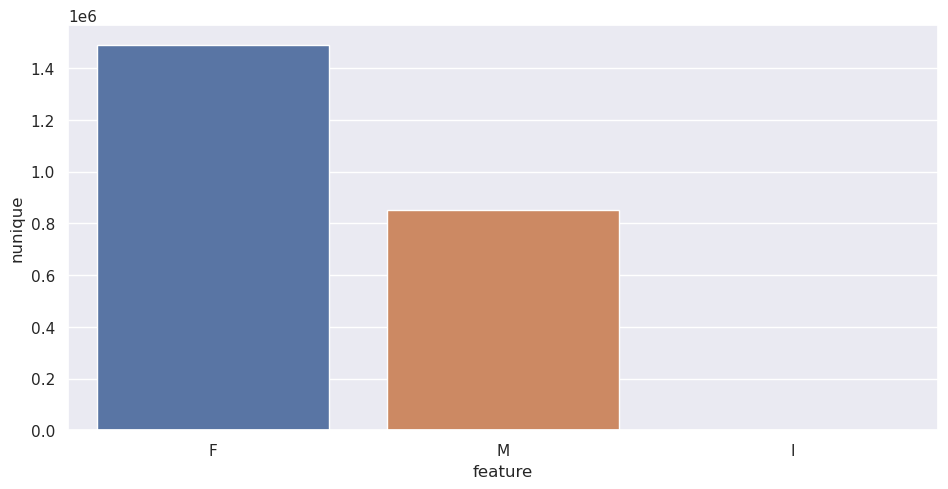

In [156]:
nu = df_left.Gender.value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [199]:
df_left.year.value_counts(normalize=True)

2019    0.482148
2020    0.462226
2021    0.055626
Name: year, dtype: float64

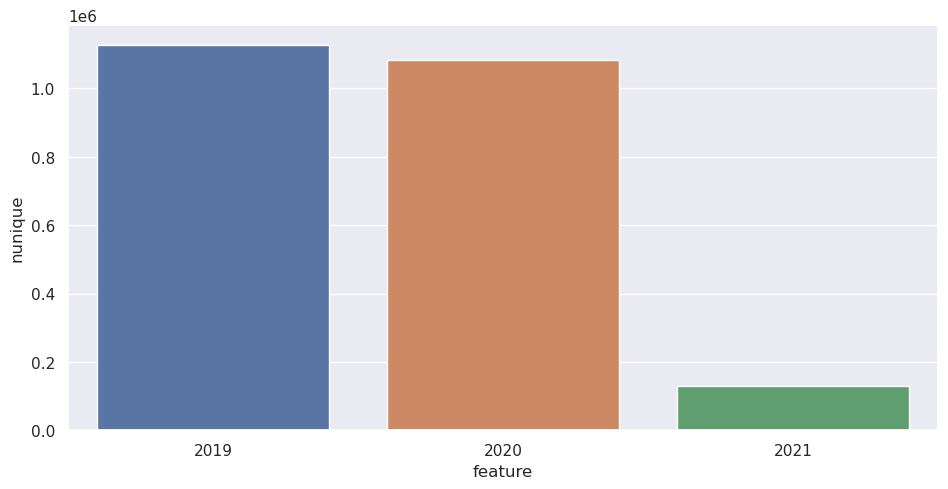

In [114]:
nu = df_left.year.value_counts().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [115]:
df_left.Lab_Id.value_counts()

L133    121886
L152     95255
L139     93495
L121     88430
L166     76159
         ...  
L442      1174
L660       645
L127       235
L967        90
L149        68
Name: Lab_Id, Length: 117, dtype: int64

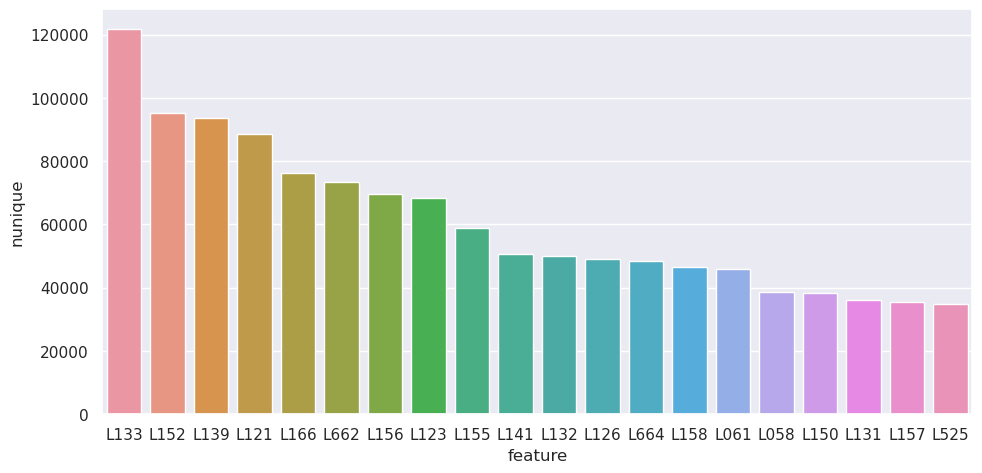

In [116]:
nu = df_left.Lab_Id.value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [117]:
df_left['Date of birth'].value_counts()

01/01/2010 00:00:00    1506
27/08/1965 00:00:00     774
09/09/1981 00:00:00     607
21/12/1975 00:00:00     550
07/06/1965 00:00:00     514
                       ... 
24/06/1932 00:00:00       1
18/07/1926 00:00:00       1
23/09/1943 00:00:00       1
11/05/1926 00:00:00       1
06/06/1920 00:00:00       1
Name: Date of birth, Length: 32914, dtype: int64

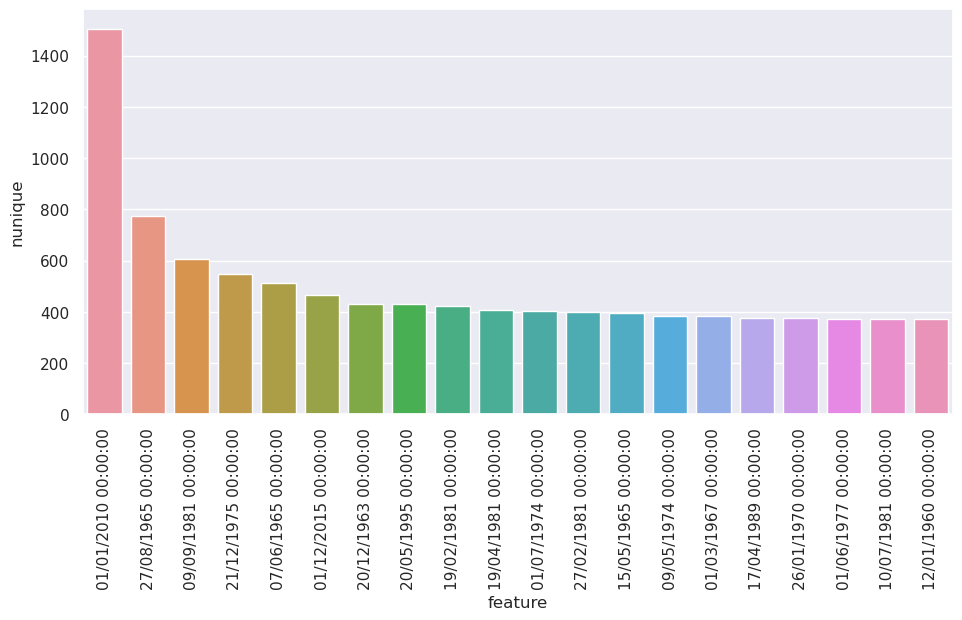

In [184]:
nu = df_left['Date of birth'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [118]:
df_left['Date of service'].value_counts()

2020-04-12    5084
2020-04-05    4909
2020-01-24    4869
2020-05-03    4833
2019-12-05    4819
              ... 
2020-07-06     216
2020-12-23     207
2019-12-30     207
2020-08-10     199
2019-01-01      21
Name: Date of service, Length: 770, dtype: int64

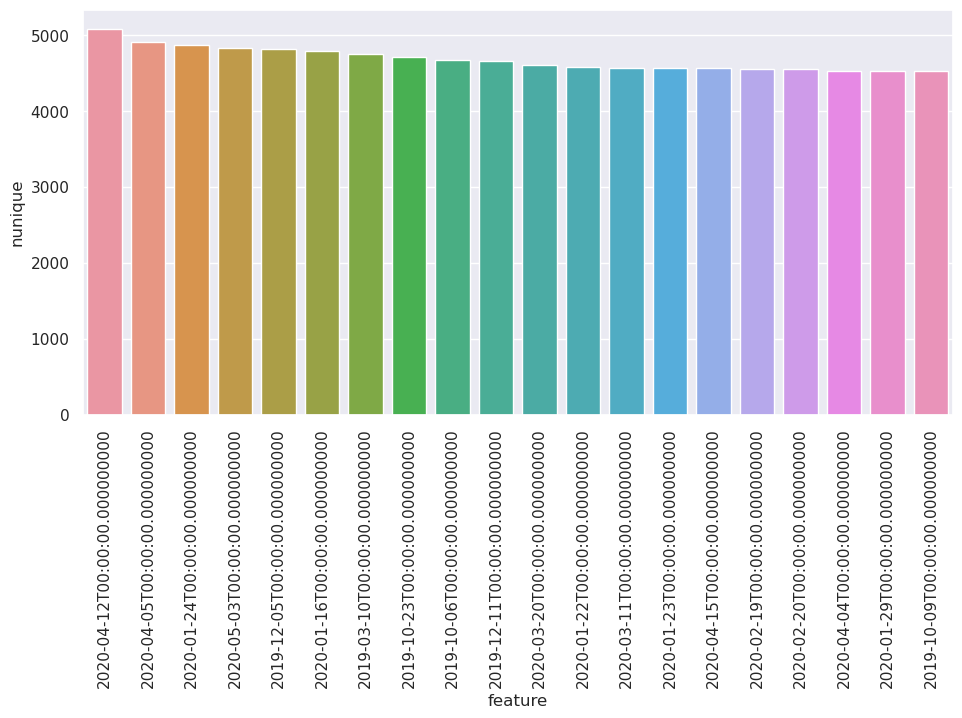

In [185]:
nu = df_left['Date of service'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [120]:
df_left['Service Id'].value_counts()

6004395771-8-1      87
6160868530-2-1      85
6169569919-1-1      85
437707339488-179    85
7659340080-5-1      81
                    ..
7659449330-1-1       1
7658491312-3-1       1
7659039663-3-1       1
7659438328-1-1       1
7659654877-2-1       1
Name: Service Id, Length: 660035, dtype: int64

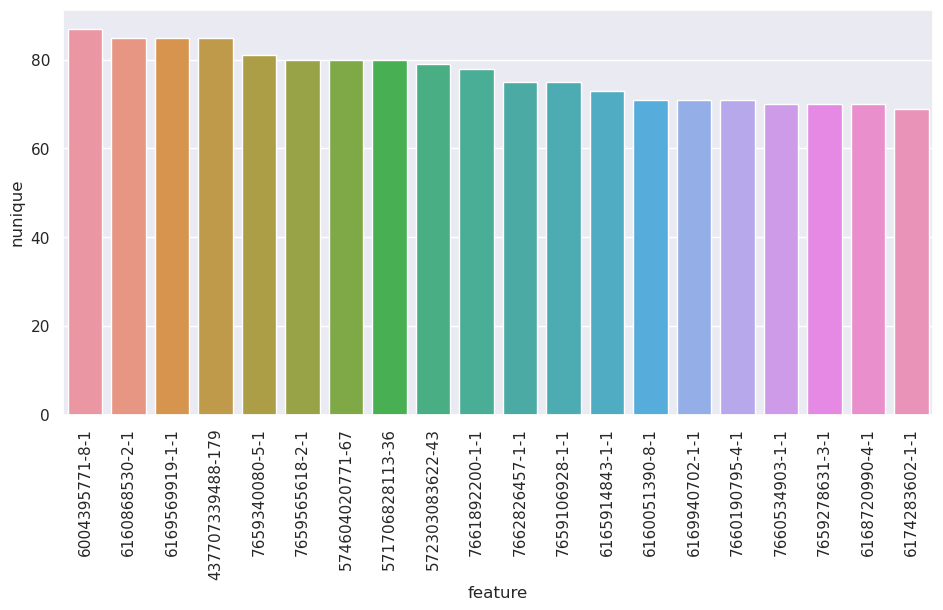

In [186]:
nu = df_left['Service Id'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [121]:
df_left['Lab_Id'].value_counts()

L133    121886
L152     95255
L139     93495
L121     88430
L166     76159
         ...  
L442      1174
L660       645
L127       235
L967        90
L149        68
Name: Lab_Id, Length: 117, dtype: int64

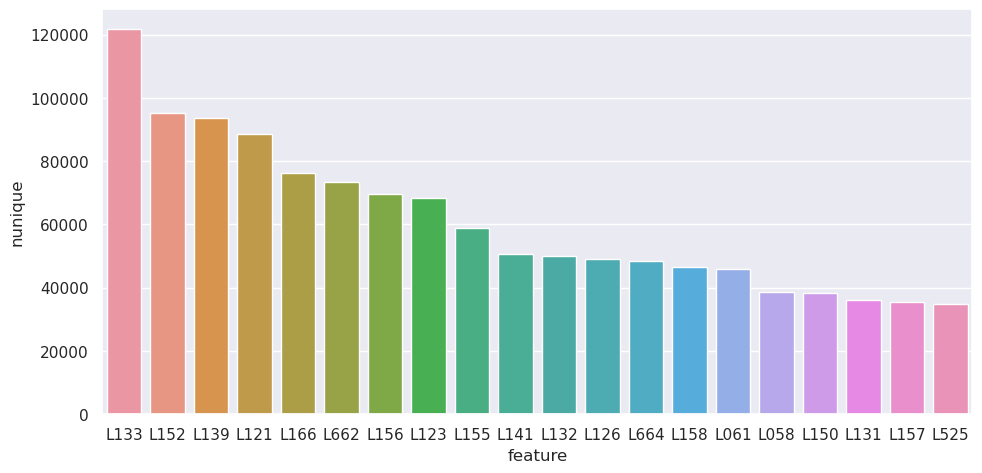

In [160]:
nu = df_left['Lab_Id'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [122]:
df_left['Address'].value_counts()

2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565    121886
3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096       95255
8100 TIMBERLAKE WAY STE E, SACRAMENTO, CA 95823     93495
15611 BEL-RED RD SUITE C, BELLEVUE, WA 98008        88430
101 EAST OLNEY AVENUE, PHILADELPHIA, PA 19120       76159
                                                    ...  
16259 SYLVESTER RD SW 402, BURIEN, WA 98148          1174
49 RANGE RD STE 101, WINDHAM, NH 03087                645
2920 KNIGHT ST STE 108, SHREVEPORT, LA 71105          235
2700 GRANT ST. SUITE 107, CONCORD, CA 94520            90
1990 MONUMENT BLVD, CONCORD, CA 94520                  68
Name: Address, Length: 117, dtype: int64

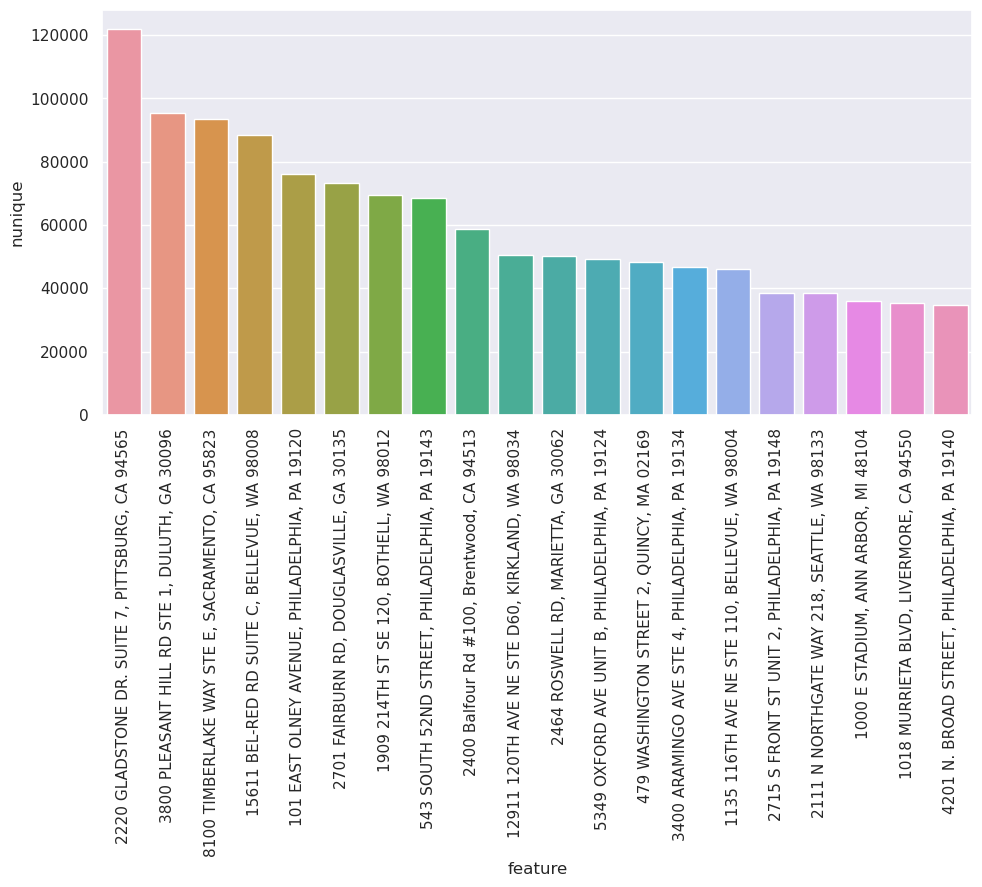

In [187]:
nu = df_left['Address'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)

In [123]:
df_left['zipcode'].value_counts()

94565.0    121886
98052.0     96761
30044.0     95255
95823.0     93495
98034.0     76192
            ...  
61469.0      2805
13441.0      2799
13304.0      2281
99999.0      1589
30004.0      1288
Name: zipcode, Length: 104, dtype: int64

In [124]:
df_left['year'].value_counts() 

2019    1128563
2020    1081931
2021     130203
Name: year, dtype: int64

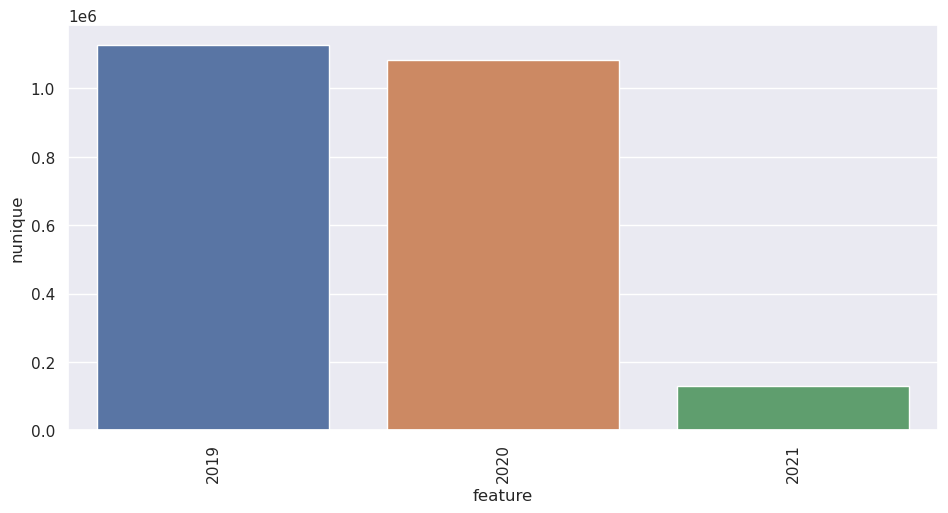

In [188]:
nu = df_left['year'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [125]:
df_left['month'].value_counts()  

1     292572
2     223983
3     206727
4     199943
10    195959
5     192683
8     180578
9     178263
11    175718
7     172995
6     168046
12    153230
Name: month, dtype: int64

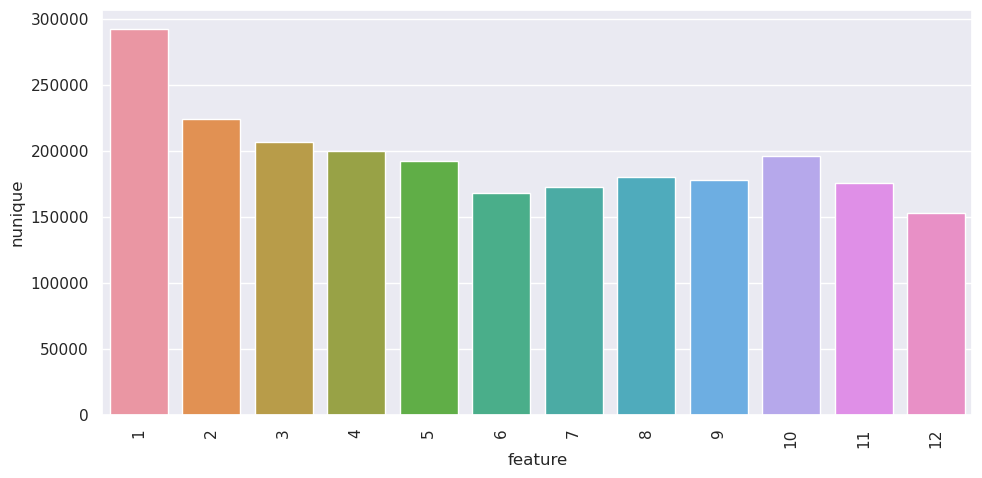

In [189]:
nu = df_left['month'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [126]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CodItem       2002 non-null   int64 
 1   Desc Item     2002 non-null   object
 2   Category      2002 non-null   object
 3   Family        2002 non-null   object
 4   Speciality    2002 non-null   object
 5   Testing_Cost  2002 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.0+ KB


In [167]:
test_data['Category'].unique()

array(['CA', 'RID', 'PA', 'FEE', 'VX',
       'CA                                      ',
       'PA                                      '], dtype=object)

In [128]:
test_data['Category'].nunique()

7

In [129]:
test_data['Category'].value_counts()  

CA                                          1578
RID                                          373
VX                                            27
PA                                            14
FEE                                            8
CA                                             1
PA                                             1
Name: Category, dtype: int64

In [200]:
test_data['Category'].value_counts(normalize=True)  

CA                                          0.788212
RID                                         0.186314
VX                                          0.013487
PA                                          0.006993
FEE                                         0.003996
CA                                          0.000500
PA                                          0.000500
Name: Category, dtype: float64

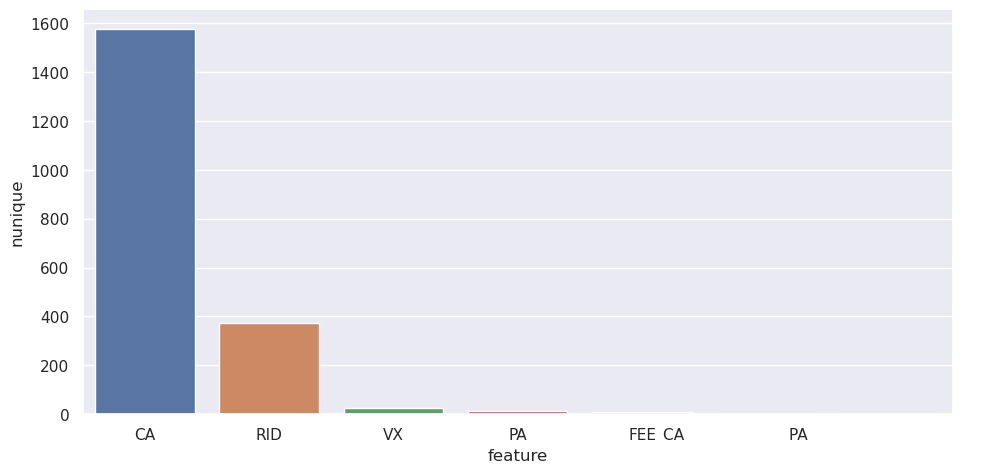

In [168]:
nu = test_data['Category'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [130]:
test_data['Family'].unique()

array(['CORELAB', 'HEMATO', 'Corelab', 'Toxico', 'GASTROENT', 'Gastroent',
       'ULTRASOUND', 'TOXICO', 'Urine', 'Copro', 'CARDIO', 'Microbio',
       'CYTO', 'GENETICS', 'Cardio', 'COPRO', 'Hemato', 'Mri', 'FEE',
       'DENSITO', 'GENITOURIN', 'MICROBIO', 'CT scan', 'MAMMO', 'Anatomo',
       'X-ray', 'X-RAY', 'Vaccine', 'Fee', 'MRI', 'VACCINE', 'Ultrasound',
       'INTERNAL', 'Neonato', 'Internal', 'CT SCAN', 'URINE', 'Densito',
       'NEONATO', 'ANATOMO', 'Mammo', 'DIAG'], dtype=object)

In [131]:
test_data['Family'].nunique()

42

In [132]:
test_data['Family'].value_counts()  

Corelab       783
GENETICS      258
CORELAB       207
ULTRASOUND    109
Toxico         99
Hemato         78
CT scan        49
Mri            48
X-ray          46
Microbio       38
MRI            30
HEMATO         25
X-RAY          24
Urine          21
Vaccine        19
Copro          18
Neonato        18
MICROBIO       14
CT SCAN        12
GENITOURIN      9
VACCINE         8
CYTO            7
Internal        7
Ultrasound      7
TOXICO          7
Anatomo         6
CARDIO          6
Fee             6
Gastroent       6
COPRO           6
INTERNAL        5
NEONATO         4
Cardio          4
DENSITO         3
MAMMO           3
Mammo           2
ANATOMO         2
FEE             2
URINE           2
GASTROENT       2
Densito         1
DIAG            1
Name: Family, dtype: int64

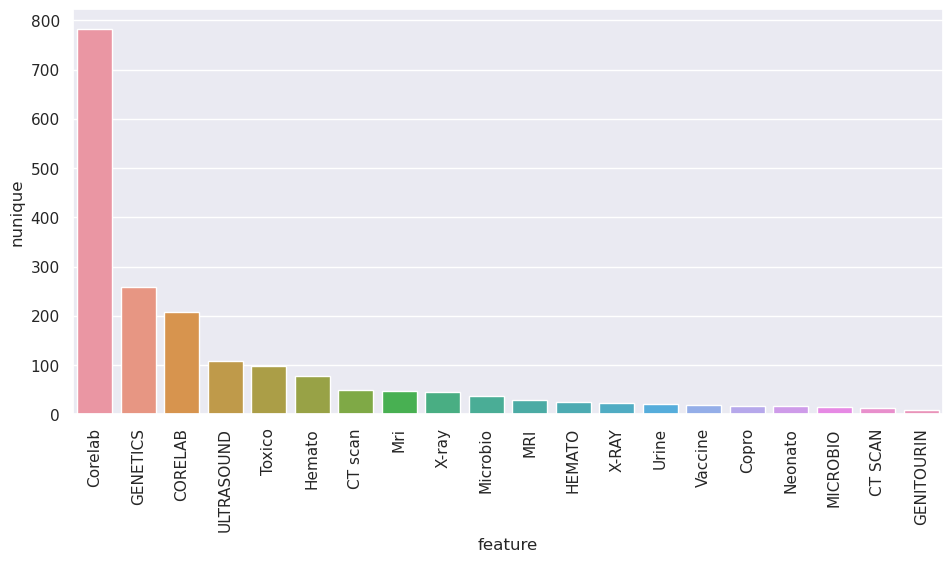

In [190]:
nu = test_data['Family'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [133]:
test_data['Speciality'].unique()

array(['BIOCHEMISTRY', 'BLOOD COUNT', 'IMMUNOHORMONE', 'TOXICOLOGY',
       'VITAMINS', 'ENDOSCOPY', 'THERAPY', 'GENERAL', 'ROUTINE',
       'COLONOSCOPY', 'INFECTIOUS', 'SPECIAL COPRO', 'ALLERGY',
       'COAGULATION', 'GRAPHICAL METHODS', 'CULTURE', 'UROCULTURE',
       'LIQUID CYTOLOGY', 'BIOMOLECULAR', 'BACTEROSCOPY',
       'IMMUNOHEMATOLOGY', 'ELECTROPHORESIS', 'ERGOMETRY', 'PARASITOLOGY',
       'ECHOCARDIOGRAPHY', 'FETAL MEDICINE', 'SKELETAL MUSCLE', 'FEE',
       'DENSITOMETRY', 'COLPOSCOPY', 'VULVOSCOPY', 'SPECIAL GENETICS',
       'MAMMOGRAPHY', 'DOPPLER', 'ANATOMOPATHOLOGICAL', 'CONVENTIONAL',
       'AUTOIMMUNITY', 'HLA', 'VACCINE', 'NEURAL', 'SPINE',
       'THERAPEUTIC DRUG', 'ONCOTIC CYTOLOGY', 'INTERNAL MEDICINE',
       'MAT / MED', 'HIDDEN BLOOD', 'CARDIAC MARKERS', 'HEAD AND NECK',
       'VASCULAR', 'CHEST', 'MYCOLOGY', 'SPECIAL', 'ABPM',
       'INVASIVE PROCEDURE', 'SCINTILOGRAPHY', 'SCREENING',
       'OCCUPATIONAL', 'HEMATOCYTOLOGY', 'PATERNITY', 'DRUG ABUSE',


In [134]:
test_data['Speciality'].nunique()

77

In [135]:
test_data['Speciality'].value_counts()  

IMMUNOHORMONE       472
BIOCHEMISTRY        248
SPECIAL GENETICS    182
ALLERGY             182
SKELETAL MUSCLE      88
                   ... 
ABPM                  1
THERAPY               1
ERGOMETRY             1
LIQUID CYTOLOGY       1
RESEARCH FEE          1
Name: Speciality, Length: 77, dtype: int64

In [201]:
test_data['Speciality'].value_counts(normalize=True)  

IMMUNOHORMONE       0.235764
BIOCHEMISTRY        0.123876
SPECIAL GENETICS    0.090909
ALLERGY             0.090909
SKELETAL MUSCLE     0.043956
                      ...   
ABPM                0.000500
THERAPY             0.000500
ERGOMETRY           0.000500
LIQUID CYTOLOGY     0.000500
RESEARCH FEE        0.000500
Name: Speciality, Length: 77, dtype: float64

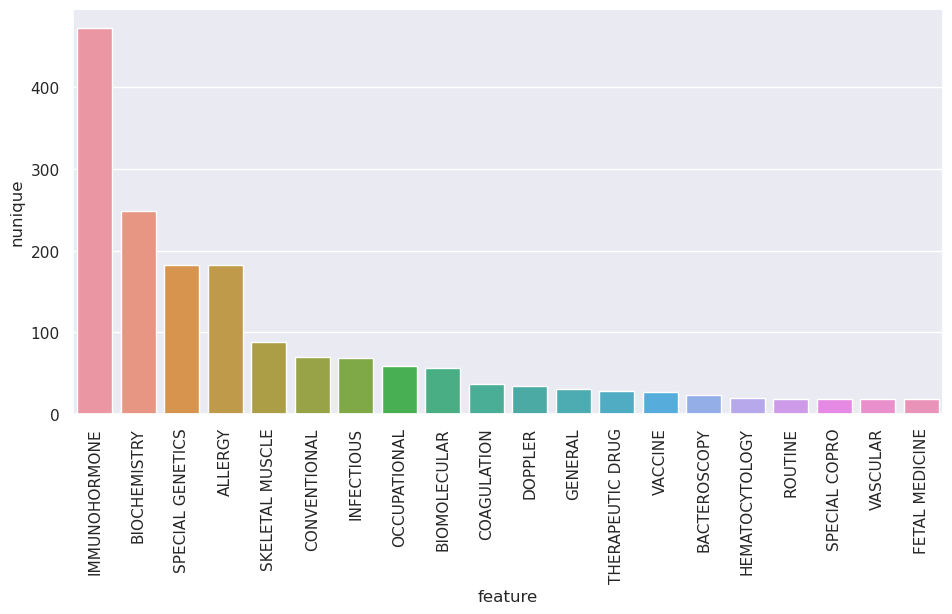

In [191]:
nu = test_data['Speciality'].value_counts()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [136]:
df_left.columns

Index(['Patient Id', 'Gender', 'Date of birth', 'Date of service',
       'Service Id', 'Lab_Id', 'CodItem', 'Testing_Cost', 'Address',
       'location', 'zipcode', 'year', 'month', 'Latitude', 'Longitude'],
      dtype='object')

In [137]:
df_left.groupby('Patient Id')['Testing_Cost'].mean()

Patient Id
-2                  22.666667
1000007167-1        12.000000
1000007439-1        13.000000
1000014746-1        27.647059
1000025251-1       113.000000
                      ...    
99958237-BIO003     18.222222
99974240-BIO010     30.000000
99999-1            125.542857
999999-1           482.588235
9999999-1          257.015955
Name: Testing_Cost, Length: 501422, dtype: float64

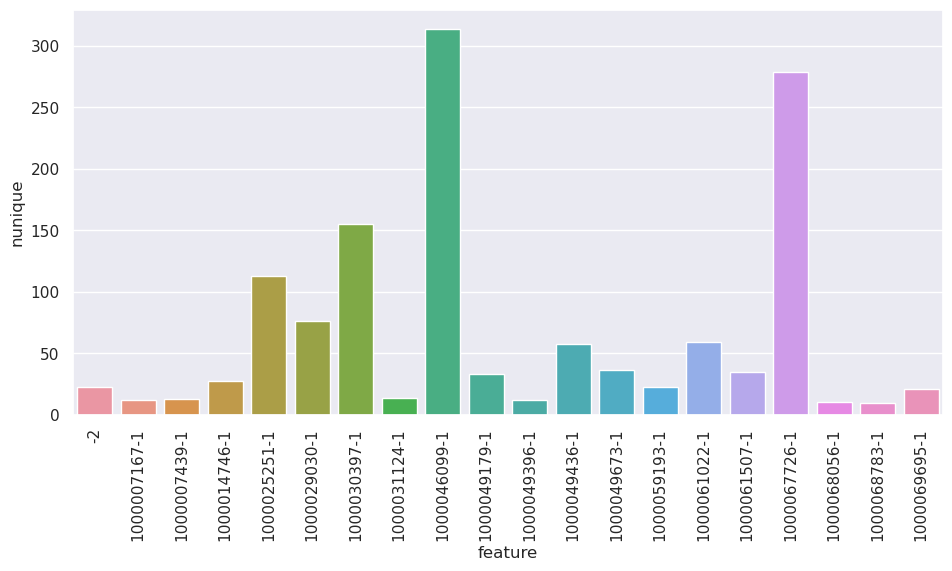

In [192]:
nu = df_left.groupby('Patient Id')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [138]:
df_left.groupby('Gender')['Testing_Cost'].mean()

Gender
F    52.936704
I    22.666667
M    47.883755
Name: Testing_Cost, dtype: float64

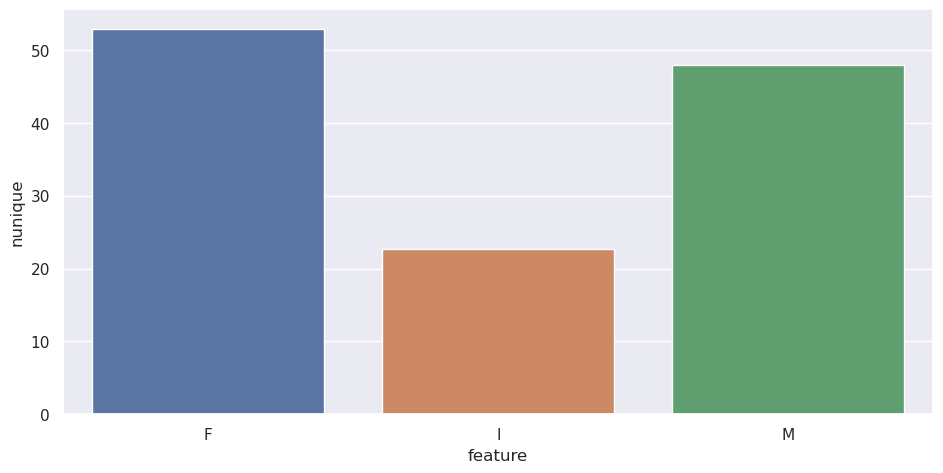

In [172]:
nu = df_left.groupby('Gender')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [139]:
df_left.groupby('Date of birth')['Testing_Cost'].mean()

Date of birth
01/01/1900 00:00:00     29.800000
01/01/1921 00:00:00     55.000000
01/01/1926 00:00:00     22.933333
01/01/1928 00:00:00    229.400000
01/01/1929 00:00:00    246.000000
                          ...    
31/12/2015 00:00:00     38.500000
31/12/2016 00:00:00     46.250000
31/12/2017 00:00:00     75.250000
31/12/2018 00:00:00    355.684211
31/12/2019 00:00:00    113.000000
Name: Testing_Cost, Length: 32914, dtype: float64

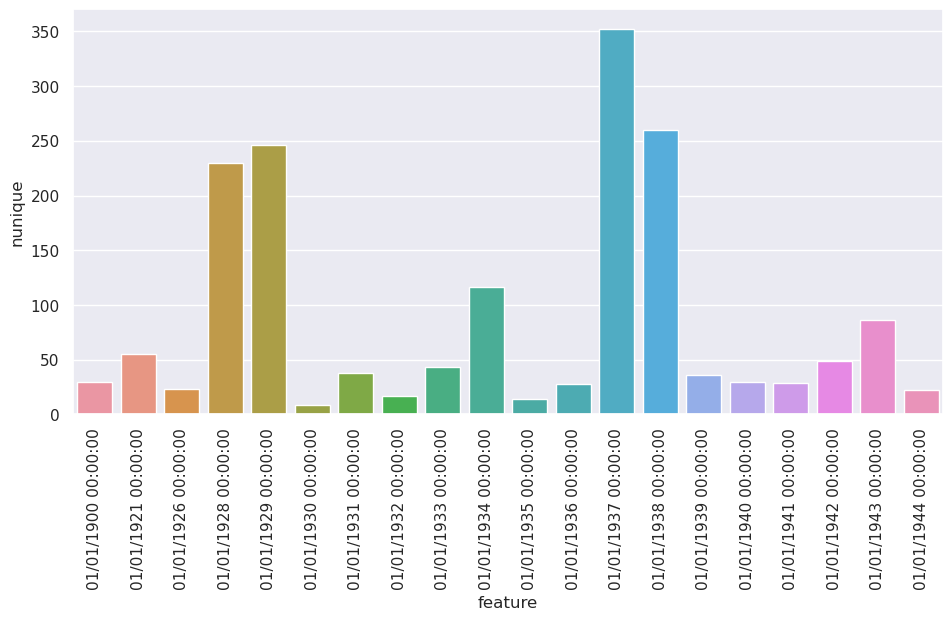

In [193]:
nu = df_left.groupby('Date of birth')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [140]:
df_left.groupby('Date of service')['Testing_Cost'].mean()

Date of service
2019-01-01    95.380952
2019-01-02    45.489268
2019-01-03    50.282399
2019-01-04    45.411948
2019-01-05    43.722067
                ...    
2021-02-08    43.357513
2021-02-09    55.732887
2021-02-10    50.076739
2021-02-11    50.619959
2021-02-12    55.365783
Name: Testing_Cost, Length: 770, dtype: float64

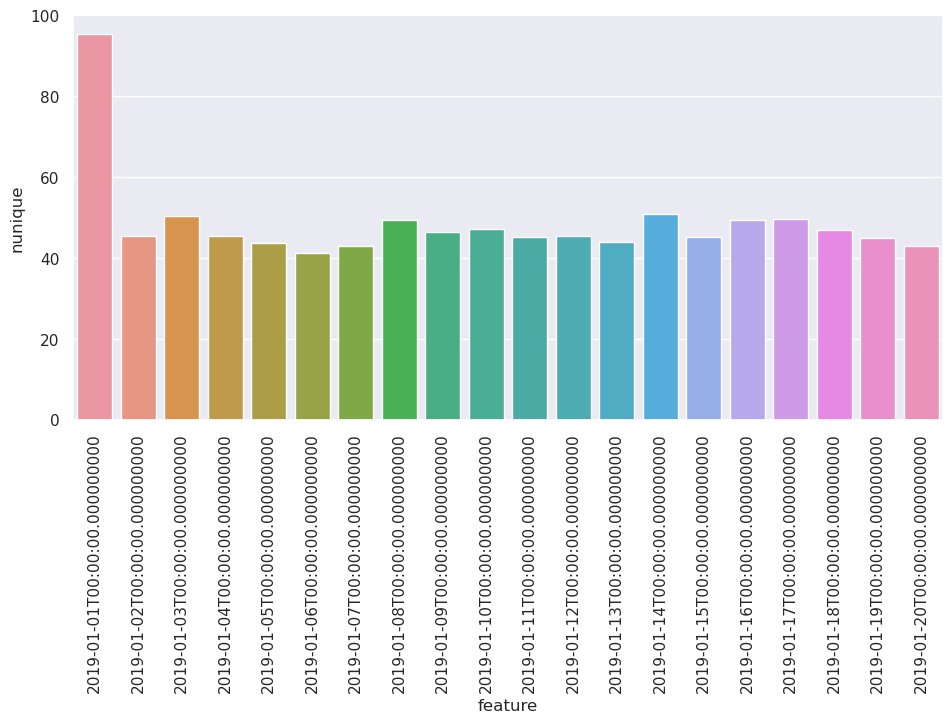

In [194]:
nu = df_left.groupby('Date of service')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [141]:
df_left.groupby('Service Id')['Testing_Cost'].mean()

Service Id
1000007167-2-1    12.000000
1000007439-1-1    13.000000
1000014746-1-1    44.000000
1000014746-2-1    31.000000
1000014746-3-1    51.000000
                    ...    
9999999-2678-1    17.333333
9999999-2770-1    11.500000
9999999-2772-1    13.000000
9999999-2790-1    17.500000
9999999-2791-1    17.500000
Name: Testing_Cost, Length: 660035, dtype: float64

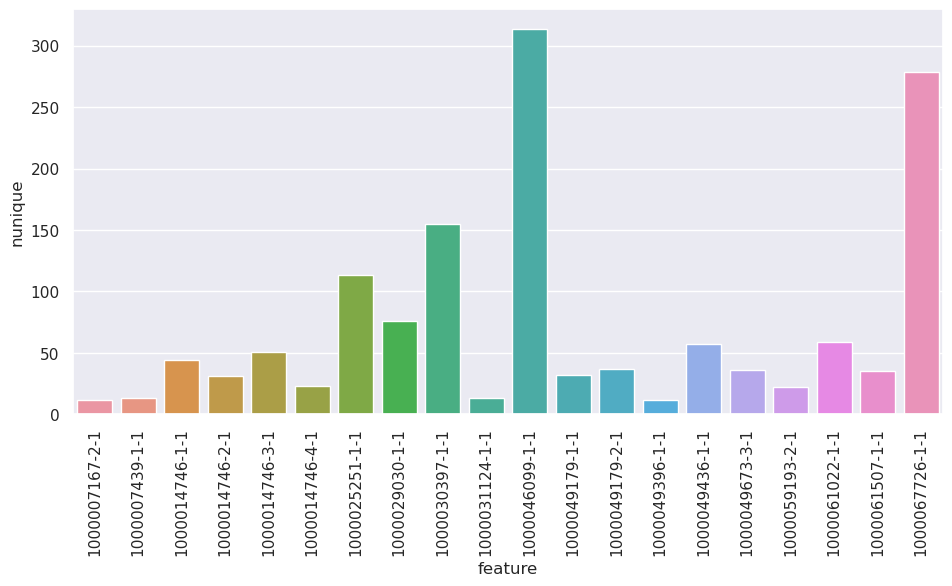

In [195]:
nu = df_left.groupby('Service Id')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [142]:
df_left.groupby('Lab_Id')['Testing_Cost'].mean() 

Lab_Id
-2       26.273128
L058     28.191891
L060     26.684595
L061     73.440978
L063     32.236039
           ...    
L886     45.046184
L889     31.045158
L903     29.200674
L922     25.688527
L967    123.446000
Name: Testing_Cost, Length: 117, dtype: float64

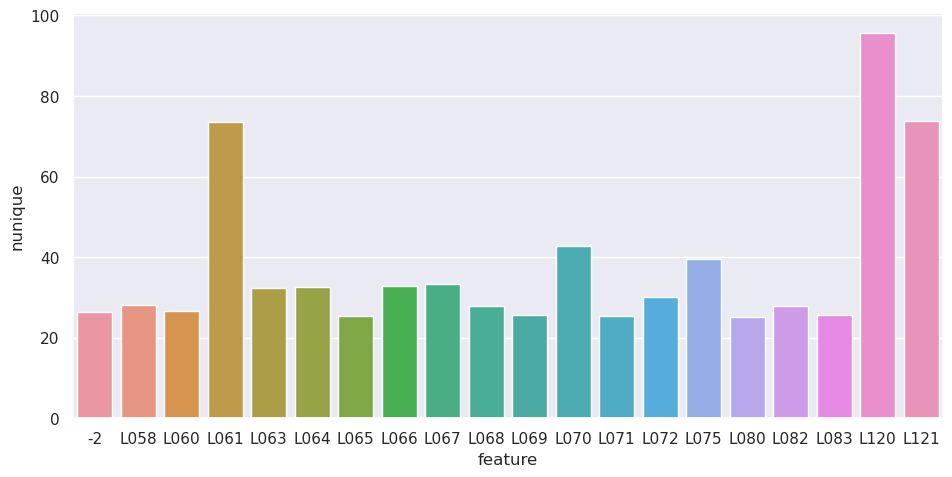

In [176]:
nu = df_left.groupby('Lab_Id')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [143]:
df_left.groupby('CodItem')['Testing_Cost'].mean()  

CodItem
70000038    433.00
70000041     15.00
70000043     47.00
70000044    185.00
70000053    175.00
             ...  
70008954     87.30
70008987    379.00
70008997     35.70
70008998     36.72
70008999     36.72
Name: Testing_Cost, Length: 2063, dtype: float64

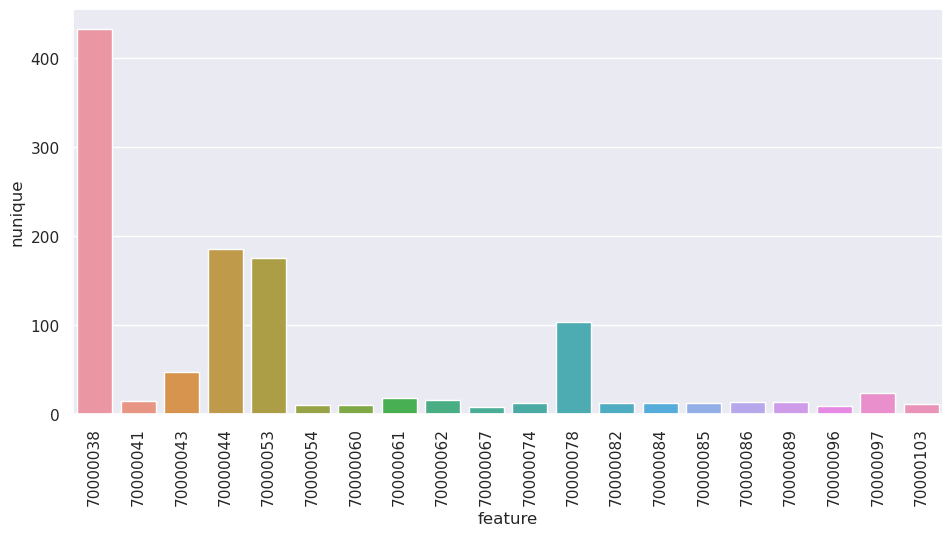

In [196]:
nu = df_left.groupby('CodItem')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [144]:
df_left.groupby('Address')['Testing_Cost'].mean()   

Address
1000 E STADIUM, ANN ARBOR, MI 48104               41.837607
101 EAST OLNEY AVENUE, PHILADELPHIA, PA 19120     61.989457
101 S. DIVISION, STRONGHURST, IL 61480            28.470506
1018 MURRIETA BLVD, LIVERMORE, CA 94550           70.706318
1101 MADISON ST STE 306, SEATTLE, WA 98104        32.049244
                                                    ...    
95 GENESEE ST, NEW HARTFORD, NY 13413             38.298066
9633 LEVIN RD NW 202, SILVERDALE, WA 98383        25.268740
975 JOHNSON FERRY RD NE 320, ATLANTA, GA 30342    34.082551
987 MAIN STREET, WEYMOUTH, MA 02190               25.688527
Unavailable                                       26.273128
Name: Testing_Cost, Length: 117, dtype: float64

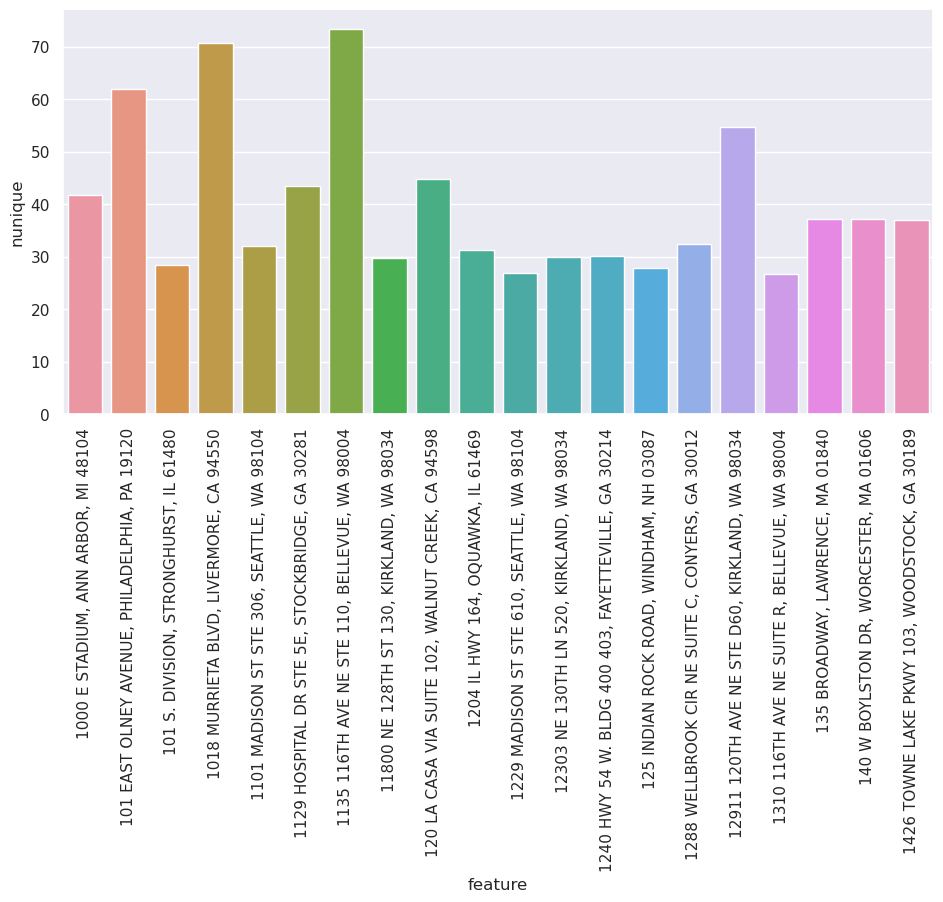

In [197]:
nu = df_left.groupby('Address')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
ax.tick_params(axis='x', rotation=90)


In [145]:
df_left.groupby('year')['Testing_Cost'].mean()    

year
2019    49.044881
2020    53.220444
2021    51.335620
Name: Testing_Cost, dtype: float64

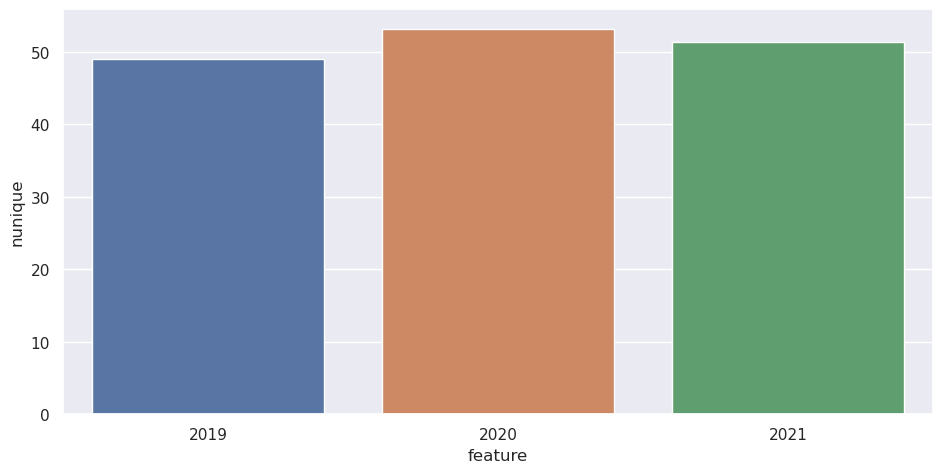

In [179]:
nu = df_left.groupby('year')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

In [146]:
df_left.groupby('month')['Testing_Cost'].mean()    

month
1     49.405509
2     49.638196
3     52.738570
4     51.720037
5     52.151851
6     50.415999
7     52.024128
8     51.236136
9     50.935099
10    50.975175
11    50.337797
12    52.937748
Name: Testing_Cost, dtype: float64

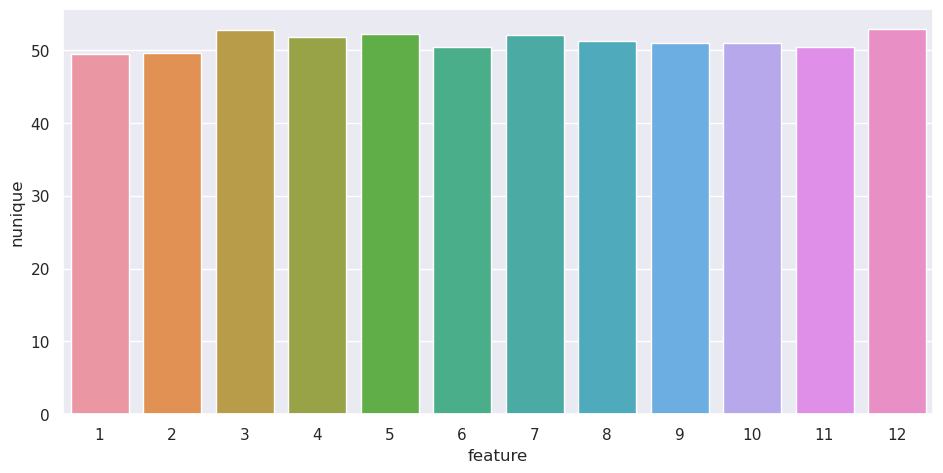

In [180]:
nu = df_left.groupby('month')['Testing_Cost'].mean()[:20].reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)

<AxesSubplot:xlabel='Gender', ylabel='Testing_Cost'>

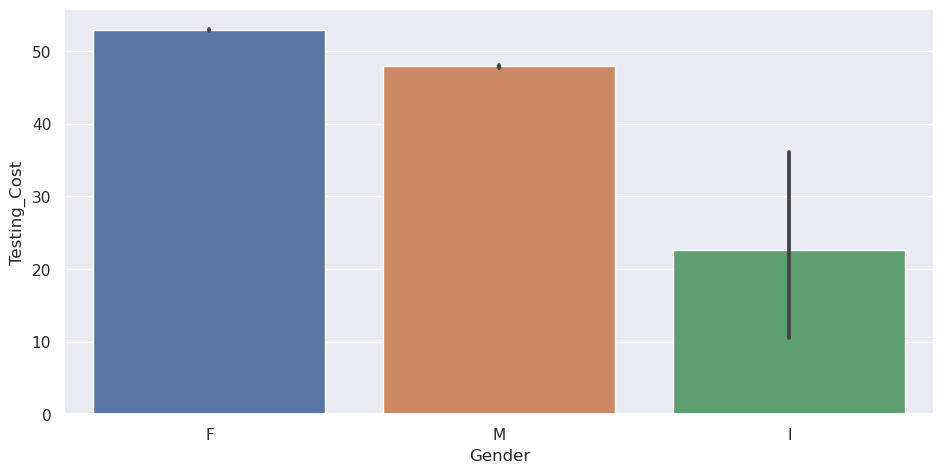

In [147]:
sns.barplot(x='Gender', y='Testing_Cost', data=df_left)

<AxesSubplot:xlabel='year', ylabel='Testing_Cost'>

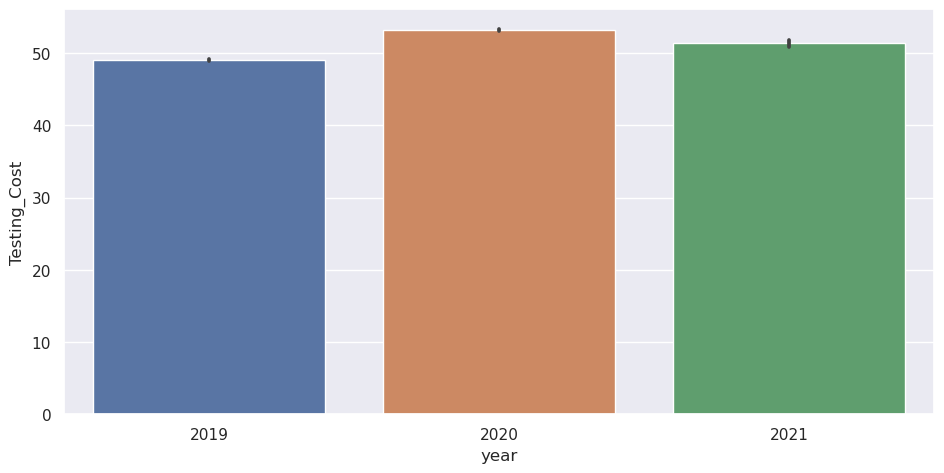

In [148]:
sns.barplot(x='year', y='Testing_Cost', data=df_left)

<AxesSubplot:xlabel='month', ylabel='Testing_Cost'>

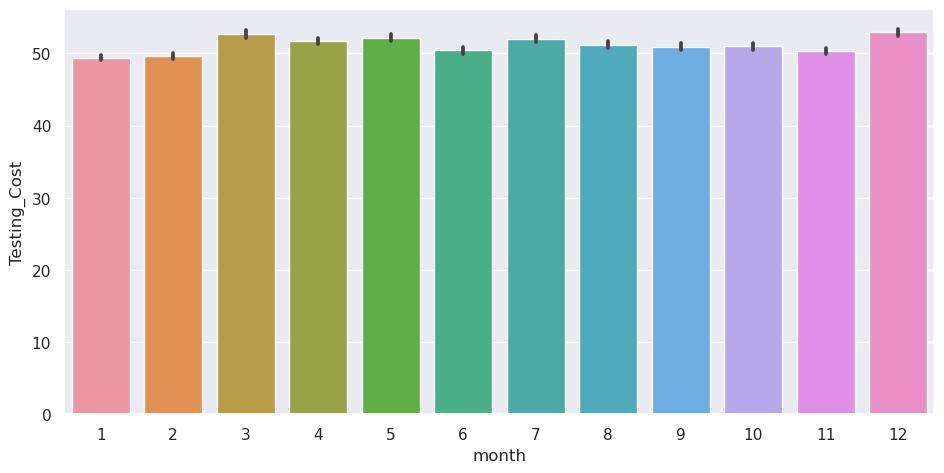

In [149]:
sns.barplot(x='month', y='Testing_Cost', data=df_left)

In [150]:
df_left.describe().T

,count,mean,std,min,25%,50%,75%,max
CodItem,2340697.0,7.000322e+07,1907.706291,70000038.0,70001127.0,70003759.0,70004461.0,70008999.0
Testing_Cost,2340697.0,5.110236e+01,97.898841,0.0,11.0,24.0,49.0,9500.0
zipcode,2340697.0,5.295893e+04,37429.559421,1605.0,19140.0,30228.0,94588.0,99999.0
year,2340697.0,2.019573e+03,0.596534,2019.0,2019.0,2020.0,2020.0,2021.0
month,2340697.0,6.033838e+00,3.537581,1.0,3.0,6.0,9.0,12.0


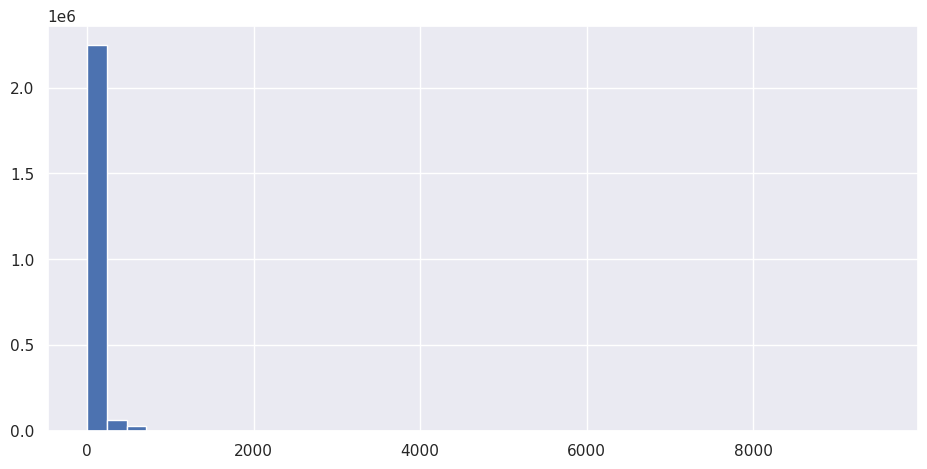

In [151]:
df_left['Testing_Cost'].hist(bins=40);

In [181]:
df_left.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab_Id,CodItem,Testing_Cost,Address,location,zipcode,year,month,Latitude,Longitude
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.0,"2220 GLADSTONE DR. SUITE 7, PITTSBURG, CA 94565","38.0070008,-121.868574",94565.0,2019,1,38.0070008,-121.868574


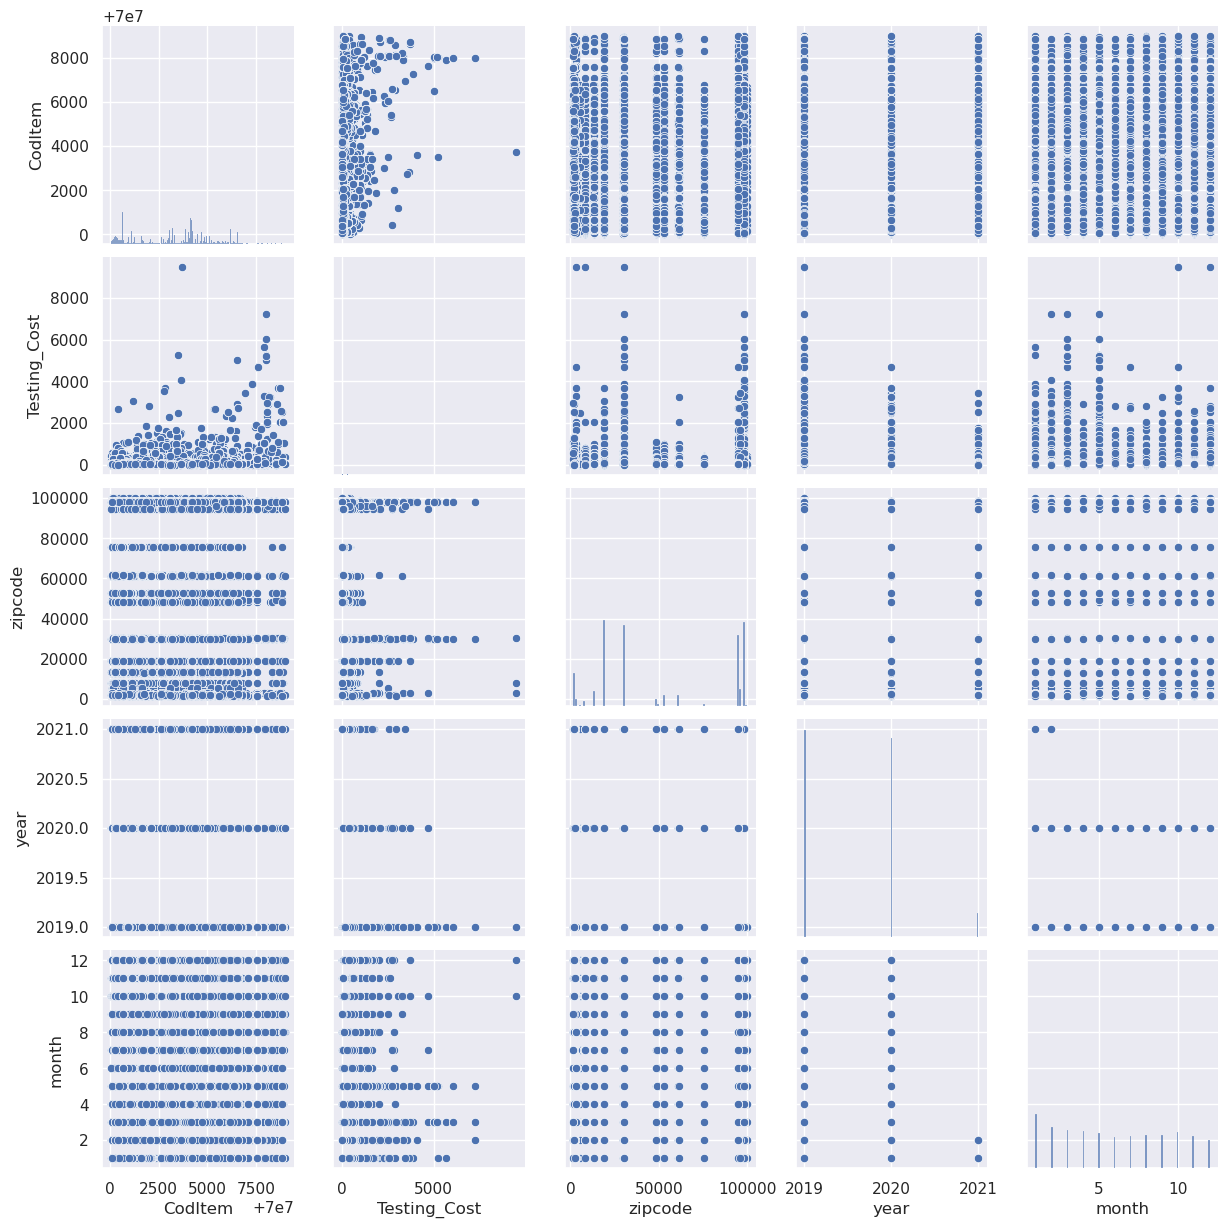

In [153]:
sns.pairplot(df_left);

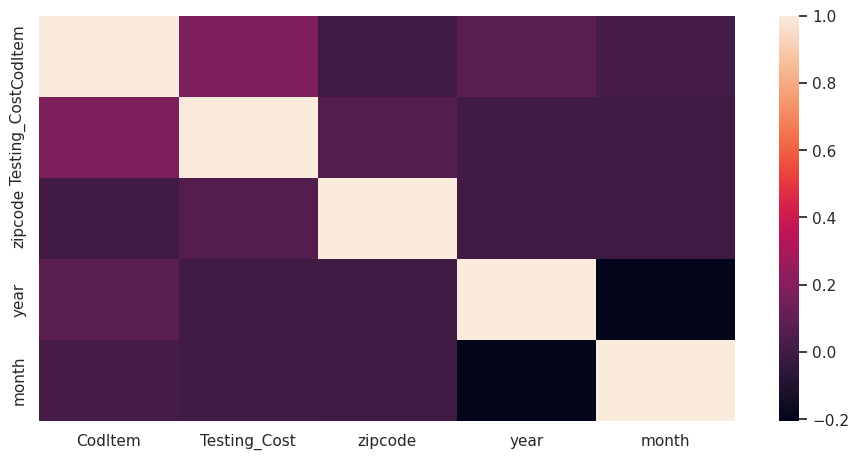

In [154]:
sns.heatmap(df_left.corr(method='spearman'));